In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import KMeansClustering as kmc
from sklearn.decomposition import PCA
import cv2

In [87]:
bayou_train=glob("group01_2/group01/train/bayou/*.jpg")

bayou_test=glob("group01_2/group01/test/bayou/*.jpg")
desert_train=glob("group01_2/group01/train/desert_vegetaiton/*.jpg")
desert_test=glob("group01_2/group01/test/desert_vegetaiton/*.jpg")
music_train=glob("group01_2/group01/train/music_store/*.jpg")
music_test=glob("group01_2/group01/test/music_store/*.jpg")

In [88]:
ls=bayou_test+bayou_train+desert_test+desert_train+music_test+music_train
ls

['group01_2/group01/test/bayou/sun_aalcrrdbjgdztbiz.jpg',
 'group01_2/group01/test/bayou/sun_aapymkzhpzyqngqq.jpg',
 'group01_2/group01/test/bayou/sun_abdfuzkqnpifraag.jpg',
 'group01_2/group01/test/bayou/sun_abdztwtjprqilmtk.jpg',
 'group01_2/group01/test/bayou/sun_abnnqvfzczgjryby.jpg',
 'group01_2/group01/test/bayou/sun_abrvkgcicupmeqcj.jpg',
 'group01_2/group01/test/bayou/sun_acqdeebwilpbhnzi.jpg',
 'group01_2/group01/test/bayou/sun_acviagnxrxwdlyir.jpg',
 'group01_2/group01/test/bayou/sun_adowkednntiyspra.jpg',
 'group01_2/group01/test/bayou/sun_adpkghabhibjfmsz.jpg',
 'group01_2/group01/test/bayou/sun_adyongvucbxhodnr.jpg',
 'group01_2/group01/test/bayou/sun_adzxbzyleecfewsv.jpg',
 'group01_2/group01/test/bayou/sun_aeaqnsdfewyxqmar.jpg',
 'group01_2/group01/test/bayou/sun_aedojhzvfiaiiupe.jpg',
 'group01_2/group01/test/bayou/sun_aejvxvyvqbeuqghj.jpg',
 'group01_2/group01/test/bayou/sun_aetnicewlsqqvjir.jpg',
 'group01_2/group01/test/bayou/sun_affccxeosrerqbvj.jpg',
 'group01_2/gr

In [89]:
X=[]
for image_path in ls:
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (256,256))  # Resize to 256x256
    X.append(img_resized.flatten()) # Convert image to NumPy array
X = np.array(X)
X.shape

(200, 196608)

In [90]:

pca = PCA(n_components=8) 
X= pca.fit_transform(X)
X

array([[ 13027.18010802,   2203.51838438,  -2043.0641904 , ...,
          1366.12058486,  -1903.88206105,  -3558.66381197],
       [ -8166.95605022,   2758.45101989,  -5834.62711834, ...,
         -1687.57661769,  -1483.35709491,   1858.96089328],
       [ 14146.43388584, -21174.46655225,  -2496.83083433, ...,
          3866.68667883,   -493.58707198,   2959.67870125],
       ...,
       [ 10421.64887727,   -578.24005041,   3708.26137117, ...,
          2426.53867185,    771.27804336,   -824.95938345],
       [ -3498.28956959,   4243.02493783,   5745.76861433, ...,
          5438.00693871,   -549.26768731,   4829.62601838],
       [  8653.87825281,  13032.25366329,   2143.39487214, ...,
          5301.19493606,    840.55205439,  -2780.82977168]])

Covariance Matrix:
[[ 1.32485475e+08  7.60638360e-10 -6.05079193e-09 -2.05505413e-09
   2.81841593e-09 -6.83993988e-11 -1.04050329e-09 -1.42377865e-09]
 [ 7.60638360e-10  7.57202902e+07 -1.12059030e-09  2.17352334e-09
   1.69856452e-10 -9.66083984e-10 -3.00303533e-09  8.15947022e-10]
 [-6.05079193e-09 -1.12059030e-09  5.65005826e+07  6.78485747e-09
  -3.29829209e-10  4.64908859e-10  5.13759921e-10  4.10532454e-10]
 [-2.05505413e-09  2.17352334e-09  6.78485747e-09  4.57628013e+07
  -1.38864508e-08 -3.49741010e-09  1.45172565e-09 -1.87381505e-09]
 [ 2.81841593e-09  1.69856452e-10 -3.29829209e-10 -1.38864508e-08
   3.21880220e+07 -1.29881302e-08  9.21634160e-10 -7.90090629e-10]
 [-6.83993988e-11 -9.66083984e-10  4.64908859e-10 -3.49741010e-09
  -1.29881302e-08  2.28273996e+07  1.10866471e-09  2.61477226e-10]
 [-1.04050329e-09 -3.00303533e-09  5.13759921e-10  1.45172565e-09
   9.21634160e-10  1.10866471e-09  1.68669851e+07 -1.37340066e-08]
 [-1.42377865e-09  8.15947022e-10  4.10532454e-10 

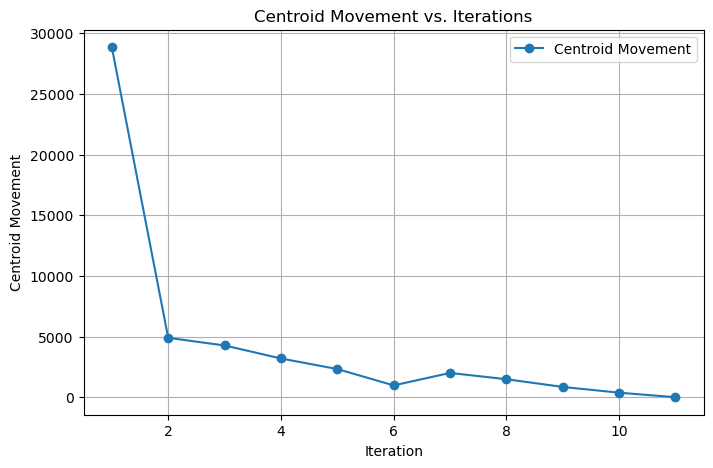

In [91]:

centroidEuclid,idxEuclid=kmc.KMeansClustering(X,3,100,False)

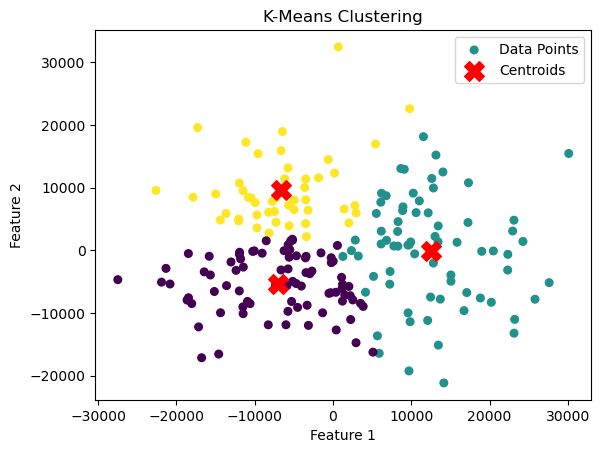

In [92]:
plt.scatter(X[:, 0], X[:, 1], c=idxEuclid, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidEuclid[:, 0], centroidEuclid[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Covariance Matrix:
[[ 1.32485475e+08  7.60638360e-10 -6.05079193e-09 -2.05505413e-09
   2.81841593e-09 -6.83993988e-11 -1.04050329e-09 -1.42377865e-09]
 [ 7.60638360e-10  7.57202902e+07 -1.12059030e-09  2.17352334e-09
   1.69856452e-10 -9.66083984e-10 -3.00303533e-09  8.15947022e-10]
 [-6.05079193e-09 -1.12059030e-09  5.65005826e+07  6.78485747e-09
  -3.29829209e-10  4.64908859e-10  5.13759921e-10  4.10532454e-10]
 [-2.05505413e-09  2.17352334e-09  6.78485747e-09  4.57628013e+07
  -1.38864508e-08 -3.49741010e-09  1.45172565e-09 -1.87381505e-09]
 [ 2.81841593e-09  1.69856452e-10 -3.29829209e-10 -1.38864508e-08
   3.21880220e+07 -1.29881302e-08  9.21634160e-10 -7.90090629e-10]
 [-6.83993988e-11 -9.66083984e-10  4.64908859e-10 -3.49741010e-09
  -1.29881302e-08  2.28273996e+07  1.10866471e-09  2.61477226e-10]
 [-1.04050329e-09 -3.00303533e-09  5.13759921e-10  1.45172565e-09
   9.21634160e-10  1.10866471e-09  1.68669851e+07 -1.37340066e-08]
 [-1.42377865e-09  8.15947022e-10  4.10532454e-10 

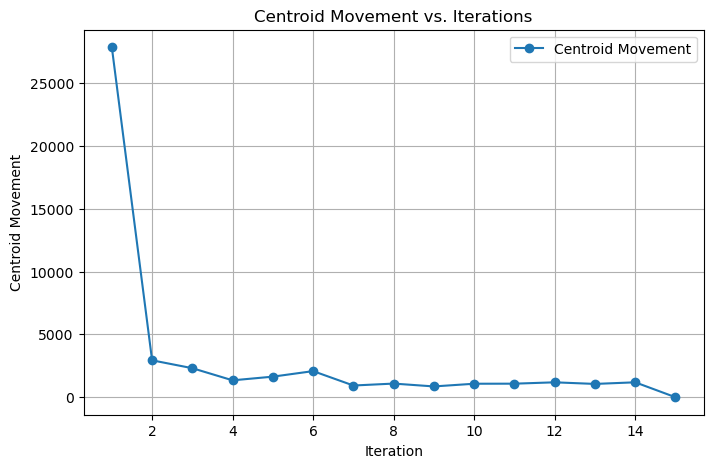

In [93]:

centroidma,idxma=kmc.KMeansClustering(X,3,100,True)

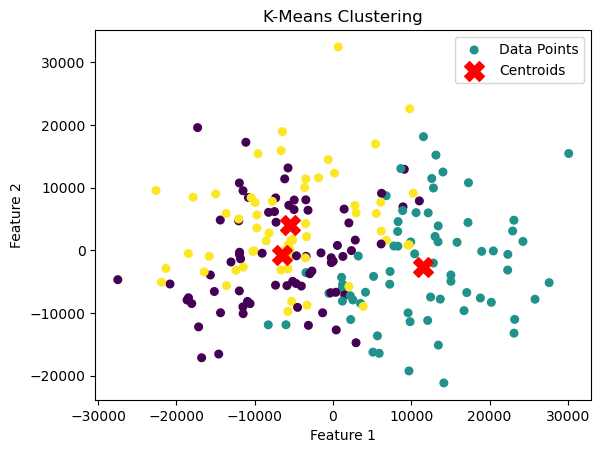

In [94]:

plt.scatter(X[:, 0], X[:, 1], c=idxma, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidma[:, 0], centroidma[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()